## 14-4장. 데이터 분석 예제 - USAD food 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='whitegrid', palette="pastel")

import warnings
warnings.filterwarnings("ignore")

- 미국 농무부의 음식 영양소 정보 
- json 파일, 각 음식의 id와 제조사, 분류구분, 영향소 정보 등 포함 

In [2]:
import json

In [11]:
#### json 파일을 로드한다 --> 리스트 형태의 파일이 생성된다. 
db = json.load(open('datasets/usda_food/database.json'))
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [12]:
db[1]   #### 하나의 음식(제품)은 매우 많은 종류의 영향소들로 구성되어 있다. 

{'id': 1009,
 'description': 'Cheese, cheddar',
 'tags': [],
 'manufacturer': '',
 'group': 'Dairy and Egg Products',
 'portions': [{'amount': 1, 'unit': 'cup, diced', 'grams': 132.0},
  {'amount': 2, 'unit': 'cup, melted', 'grams': 244.0},
  {'amount': 3, 'unit': 'cup, shredded', 'grams': 113.0},
  {'amount': 4, 'unit': 'oz', 'grams': 28.35},
  {'amount': 5, 'unit': 'cubic inch', 'grams': 17.0},
  {'amount': 6, 'unit': 'slice (1 oz)', 'grams': 28.0}],
 'nutrients': [{'value': 24.9,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  {'value': 33.14,
   'units': 'g',
   'description': 'Total lipid (fat)',
   'group': 'Composition'},
  {'value': 1.28,
   'units': 'g',
   'description': 'Carbohydrate, by difference',
   'group': 'Composition'},
  {'value': 3.93, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
  {'value': 403.0,
   'units': 'kcal',
   'description': 'Energy',
   'group': 'Energy'},
  {'value': 0.24, 'units': 'g', 'description': 'Sucrose', 'g

In [15]:
#####################################################################################
########### 1. 어떤 음식들이 많은가? 
#####################################################################################

In [24]:
#### 먼저 필요한 컬럼만 가지고 DataFrame을 만든다. 
food_info = pd.DataFrame(db, columns = ['id', 'description', 'manufacturer', 'group'])
print( food_info.shape ) 
food_info.head()

(6636, 4)


,id,description,manufacturer,group
0,1008,"Cheese, caraway",,Dairy and Egg Products
1,1009,"Cheese, cheddar",,Dairy and Egg Products
2,1018,"Cheese, edam",,Dairy and Egg Products
3,1019,"Cheese, feta",,Dairy and Egg Products
4,1028,"Cheese, mozzarella, part skim milk",,Dairy and Egg Products


In [25]:
#### 그룹별로 카운팅하여, 어떤 종류의 음식이 많은지 알아보자 
food_info['group'].value_counts()[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

- 야채, 소고기, 빵, 시리얼 순으로 나타났다. 

In [26]:
#####################################################################################
########### 2. 영향소 정보 분석 
##########     - 영향소 리스트를 DataFrame으로 생성하고, key값(id) 추가 
##########     - id를 기준으로 food_info 테이블과 영향소 테이블을 연결 
#####################################################################################

In [29]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [30]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [31]:
nutrients.duplicated().sum()   ### 중복값 확인 

14179

In [32]:
### 중복값을 제거 
nutrients = nutrients.drop_duplicates()
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [38]:
###### 두 데이터 프레임의 컬럼들을 확인하고, 병합  
###### 키값은 id이며, outer join 한다. 
print( nutrients.columns )
print( food_info.columns ) 

Index(['value', 'units', 'description', 'group', 'id'], dtype='object')
Index(['id', 'description', 'manufacturer', 'group'], dtype='object')


In [40]:
ndata = pd.merge(nutrients, food_info, on = 'id', how = 'outer')
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
value            375176 non-null float64
units            375176 non-null object
description_x    375176 non-null object
group_x          375176 non-null object
id               375176 non-null int64
description_y    375176 non-null object
manufacturer     293054 non-null object
group_y          375176 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


- Error!! : description, group는 두 데이터셋에 모두 존재하는 컬럼이나, 내용과 의미하는 바는 다르다. 

In [42]:
#### 먼저 컬럼을 각각 renaming 해주자 
col_mapping_1 = { 'description': 'food', 'group': 'food_group' } 
col_mapping_2 = { 'description': 'nutrients', 'group': 'nutrients_group' }

food_info = food_info.rename(columns = col_mapping_1, copy = False)
nutrients = nutrients.rename(columns = col_mapping_2, copy = False)

In [43]:
ndata = pd.merge(nutrients, food_info, on = 'id', how = 'outer')
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
value              375176 non-null float64
units              375176 non-null object
nutrients          375176 non-null object
nutrients_group    375176 non-null object
id                 375176 non-null int64
food               375176 non-null object
manufacturer       293054 non-null object
food_group         375176 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [44]:
ndata.head()

,value,units,nutrients,nutrients_group,id,food,manufacturer,food_group
0,25.18,g,Protein,Composition,1008,"Cheese, caraway",,Dairy and Egg Products
1,29.20,g,Total lipid (fat),Composition,1008,"Cheese, caraway",,Dairy and Egg Products
2,3.06,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",,Dairy and Egg Products
3,3.28,g,Ash,Other,1008,"Cheese, caraway",,Dairy and Egg Products
4,376.00,kcal,Energy,Energy,1008,"Cheese, caraway",,Dairy and Egg Products


In [45]:
#### food group별 특정 영향소의 평균 함유량 구하기 
aa = ndata.groupby([ 'nutrients', 'food_group' ])['value'].mean()
aa

nutrients         food_group                       
Adjusted Protein  Sweets                               12.900000
                  Vegetables and Vegetable Products     2.180000
Alanine           Baby Foods                            0.196216
                  Baked Products                        0.263233
                  Beef Products                         1.499070
                                                         ...    
Zinc, Zn          Snacks                                2.211039
                  Soups, Sauces, and Gravies            0.467564
                  Spices and Herbs                      2.391220
                  Sweets                                0.743369
                  Vegetables and Vegetable Products     0.483308
Name: value, Length: 2246, dtype: float64

In [48]:
#### 아연이 가장 많이 함유된 음식은? 
bb = aa['Zinc, Zn'].sort_values(ascending = False)
bb

food_group
Breakfast Cereals                    6.068359
Beef Products                        5.869094
Lamb, Veal, and Game Products        4.098909
Nut and Seed Products                3.860078
Finfish and Shellfish Products       2.918000
Poultry Products                     2.549130
Pork Products                        2.413720
Spices and Herbs                     2.391220
Sausages and Luncheon Meats          2.247130
Snacks                               2.211039
Ethnic Foods                         2.063824
Legumes and Legume Products          2.012952
Dairy and Egg Products               1.930396
Cereal Grains and Pasta              1.487363
Restaurant Foods                     1.378627
Fast Foods                           1.336818
Baby Foods                           1.330622
Baked Products                       0.822194
Sweets                               0.743369
Meals, Entrees, and Sidedishes       0.716585
Vegetables and Vegetable Products    0.483308
Soups, Sauces, and Grav

In [53]:
#### 비타민씨가 가장 많이 함유된 음식은? 
cc = aa['Vitamin C, total ascorbic acid'].sort_values(ascending = False)
cc

food_group
Beverages                            43.872881
Fruits and Fruit Juices              30.085583
Vegetables and Vegetable Products    26.305198
Snacks                               19.527673
Baby Foods                           18.519807
Breakfast Cereals                    15.518546
Ethnic Foods                         12.646392
Spices and Herbs                     11.004878
Nut and Seed Products                 5.919685
Soups, Sauces, and Gravies            5.793846
Sweets                                4.850898
Restaurant Foods                      4.560000
Fast Foods                            3.888350
Sausages and Luncheon Meats           3.700917
Meals, Entrees, and Sidedishes        3.542222
Dairy and Egg Products                2.937143
Legumes and Legume Products           2.558523
Lamb, Veal, and Game Products         2.341901
Fats and Oils                         1.545556
Finfish and Shellfish Products        1.353725
Pork Products                         1.248476
Po

In [55]:
#### 마그네슘이 가장 많이 함유된 음식은? 
dd = aa['Magnesium, Mg'].sort_values(ascending = False)
dd

food_group
Nut and Seed Products                199.330709
Snacks                                92.896774
Legumes and Legume Products           87.631944
Spices and Herbs                      73.024390
Cereal Grains and Pasta               68.956044
Breakfast Cereals                     66.851562
Ethnic Foods                          44.049020
Finfish and Shellfish Products        39.482353
Sweets                                36.784946
Vegetables and Vegetable Products     32.060226
Dairy and Egg Products                31.635417
Baked Products                        29.581609
Beverages                             26.017167
Restaurant Foods                      24.156863
Lamb, Veal, and Game Products         22.526471
Fast Foods                            22.042493
Poultry Products                      21.747826
Beef Products                         21.702265
Baby Foods                            20.746411
Pork Products                         20.140244
Meals, Entrees, and Sidedishe

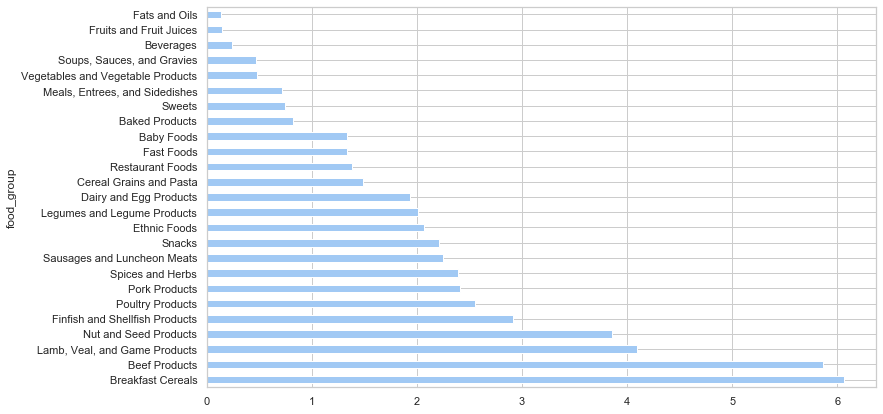

In [63]:
### 아연이 많은 음식 - 시각화
bb.plot(kind='barh', figsize = (12,7))

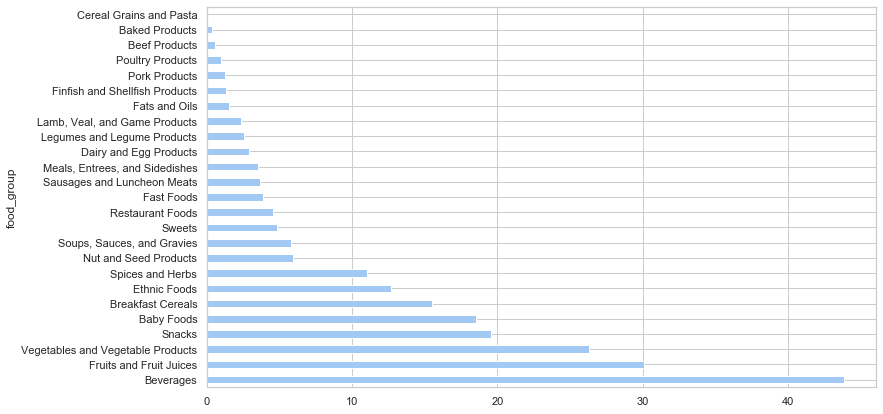

In [65]:
### 비타민씨가 많은 음식 - 시각화
cc.plot(kind='barh', figsize = (12,7))

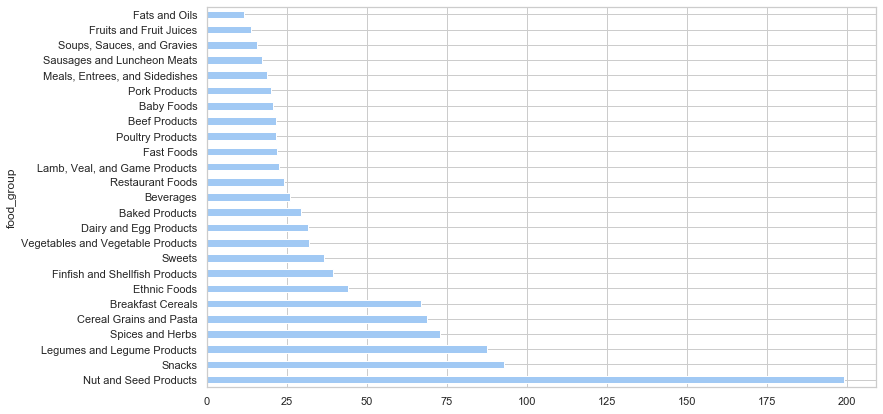

In [64]:
### 마그네슘이 많은 음식 - 시각화
dd.plot(kind='barh', figsize = (12,7))